<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import warnings

### Data Collection

In [2]:
test = pd.read_csv('data_cleaned_duration.csv')

In [3]:
test.drop('duration', inplace=True, axis=1)

In [4]:
test.dropna(inplace=True)

In [5]:
test

,text,label
0,info,1
1,jadwal buat kartu mahasiswa bri fontein kupang,0
3,malam tari tunaitapi uang atmtapi saldo rekeni...,-1
4,complain mbk,-1
5,umum,-1
...,...,...
20110,sy pinjam dana kur jamin bpkb motor sy,0
20111,stor tunai uang saldo nambah urus bri unit taw...,0
20112,isi pulsa xl aplikasi brimo saldo potong pulsa...,0
20113,trima kasih,-1


In [6]:
def label_normalize(label): 
    return label+1

In [7]:
test['label'] = test['label'].apply(lambda label: label_normalize(label))

In [8]:
test['label']

0        2
1        1
3        0
4        0
5        0
        ..
20110    1
20111    1
20112    1
20113    0
20114    1
Name: label, Length: 18938, dtype: int64

In [9]:
test.head(11)

,text,label
0,info,2
1,jadwal buat kartu mahasiswa bri fontein kupang,1
3,malam tari tunaitapi uang atmtapi saldo rekeni...,0
4,complain mbk,0
5,umum,0
6,briguna karya,1
8,oh,1
9,bawa bank bri dekat aju transfer bri eform bri,1
10,tangan uang yg setor tunai macet atm emg min,1
11,brimo,0


In [10]:
test.isnull().any()

text     False
label    False
dtype: bool

In [11]:
test.dropna(inplace=True)

### EDA

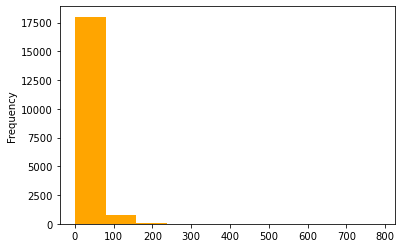

In [12]:
# checking the distribution of tweets in the data

length_test = test['text'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [13]:
# adding a column to represent the length of the tweet

test['len'] = test['text'].str.len()

test.head(10)

,text,label,len
0,info,2,4
1,jadwal buat kartu mahasiswa bri fontein kupang,1,46
3,malam tari tunaitapi uang atmtapi saldo rekeni...,0,55
4,complain mbk,0,12
5,umum,0,4
6,briguna karya,1,13
8,oh,1,2
9,bawa bank bri dekat aju transfer bri eform bri,1,46
10,tangan uang yg setor tunai macet atm emg min,1,44
11,brimo,0,5


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

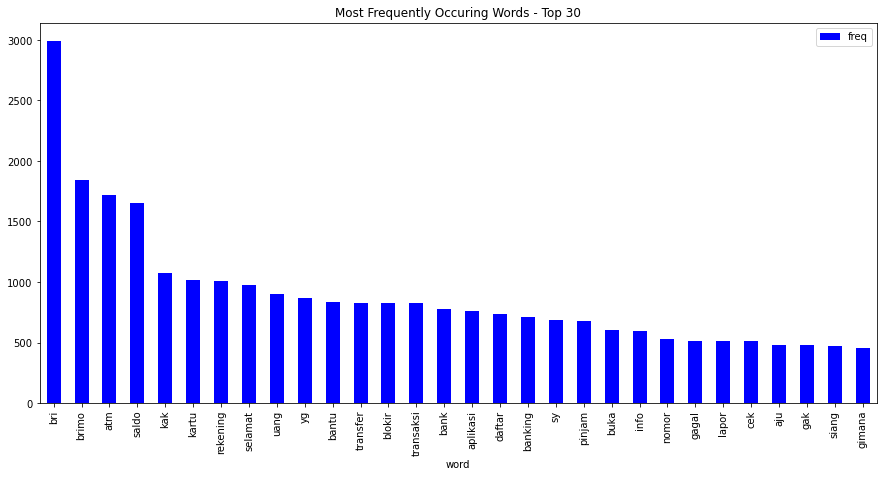

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary')

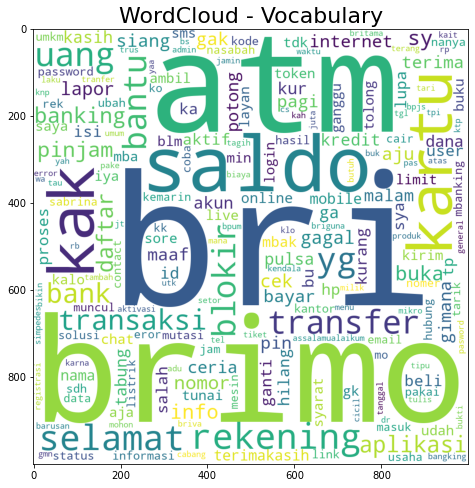

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8)) 
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary", fontsize = 22)

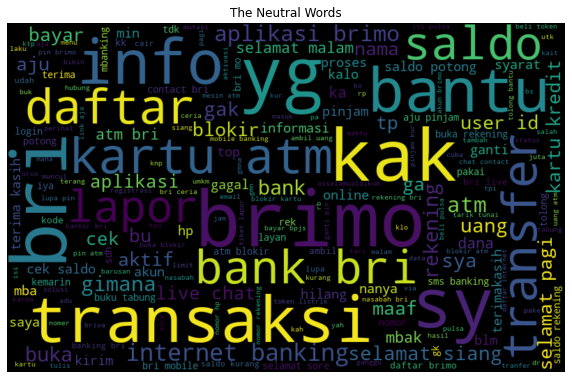

In [16]:
normal_words =' '.join([text for text in test['text'][test['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

### Preprocessing

In [17]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
test

,text,label,len
0,info,2,4
1,jadwal buat kartu mahasiswa bri fontein kupang,1,46
3,malam tari tunaitapi uang atmtapi saldo rekeni...,0,55
4,complain mbk,0,12
5,umum,0,4
...,...,...,...
20110,sy pinjam dana kur jamin bpkb motor sy,1,38
20111,stor tunai uang saldo nambah urus bri unit taw...,1,177
20112,isi pulsa xl aplikasi brimo saldo potong pulsa...,1,52
20113,trima kasih,0,11


In [20]:
test['text'].iloc[2]

'malam tari tunaitapi uang atmtapi saldo rekening kurang'

In [33]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000)
test_corpus = test['text'].tolist()
x_test = cv.fit_transform(test_corpus)

print(x_test.shape)


(18938, 1000)


In [34]:
x_test.toarray()[0][0]

0

In [35]:
y_test = test['label']

### Training

In [36]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
x_train = x_test.toarray()[:int(len(x_test.toarray())*0.8)]
x_valid = x_test.toarray()[int(len(x_test.toarray())*0.8):]

In [38]:
y_train = test["label"][:int(len(x_test.toarray())*0.8)]
y_valid = test["label"][int(len(x_test.toarray())*0.8):]

In [39]:
len(y_train)

15150

In [45]:
# splitting the training data into train and valid sets

# from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_test.toarray(), test["label"], test_size = 0.20, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(15150, 9196)
(3788, 9196)
(15150,)
(3788,)


In [24]:
# standardization

# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# x_train = sc.fit_transform(x_train)
# x_valid = sc.transform(x_valid)
# x_test = sc.transform(x_test)


In [25]:
type(x_test) 66 65 52

scipy.sparse.csr.csr_matrix

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_leaf=20, max_depth=15)
model.fit(x_train, y_train)


a = datetime.datetime.now()
y_pred = model.predict(x_valid)
b = datetime.datetime.now()

print("Inference Time(ms): ", (b-a).microseconds / 1000)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average="weighted"))

# confusion matrix
# cm = confusion_matrix(y_valid, y_pred)
# print(cm)

Inference Time(ms):  76.953
Training Accuracy : 0.663960396039604
Validation Accuracy : 0.6583949313621964
f1 score : 0.5227752177068824


In [41]:
import lightgbm as lgb

# x_train = x_train.astype('float32') 73 71 68
# y_train = y_train.astype('float32')
# x_valid = x_valid.astype('float32')
# y_valid = y_valid.astype('float32')

model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.2, min_data_in_leaf=20, max_depth=10)
model.fit(x_train, y_train)

a = datetime.datetime.now()
y_pred = model.predict(x_valid)
b = datetime.datetime.now()

print("Inference Time(ms): ", (b-a).microseconds / 1000)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average="weighted"))

# confusion matrix
# cm = confusion_matrix(y_valid, y_pred)
# print(cm)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Inference Time(ms):  52.445
Training Accuracy : 0.7348514851485148
Validation Accuracy : 0.7188489968321014
f1 score : 0.6829717121634411


In [43]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=15)
model.fit(x_train, y_train)

a = datetime.datetime.now()
y_pred = model.predict(x_valid)
b = datetime.datetime.now()

print("Inference Time(ms): ", (b-a).microseconds / 1000)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred, average="weighted"))

# confusion matrix
# cm = confusion_matrix(y_valid, y_pred)
# print(cm)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:09:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  257.018
Training Accuracy : 0.7762376237623763
Validation Accuracy : 0.7270327349524816
f1 score : 0.6921882683070419


In [ ]:
from sklearn.model_selection import GridSearchCV
PARAMS = {
    'min_samples_leaf': [5,10,15,20],
    'max_leaf_nodes': [None,5,10,15,20],
    'min_samples_split': [5,10,15,20]
}
rf = RandomForestClassifier(max_features=None)
clf = GridSearchCV(estimator=rf, param_grid=PARAMS, scoring='f1_weighted', cv=5, n_jobs=-1, verbose=10)
result = clf.fit(x_train, y_train)



Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5; 1/80] START max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5
[CV 1/5; 1/80] END max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5;, score=0.694 total time= 9.4min
[CV 4/5; 1/80] START max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5
[CV 4/5; 1/80] END max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5;, score=0.684 total time= 9.3min
[CV 1/5; 2/80] START max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10
[CV 1/5; 2/80] END max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10;, score=0.690 total time= 9.4min
[CV 3/5; 2/80] START max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10
[CV 3/5; 2/80] END max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10;, score=0.681 total time= 9.0min
[CV 5/5; 2/80] START max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10
[CV 5/5; 2/80] END max_leaf_nodes=None, min_samples_leaf=5, min_samples

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
PARAMS = {
    'min_data_in_leaf': [10, 20, 30, 40],
    'learning_rate': [0.01, 0.1, 0.2, 0.4],
    'num_leaves': [10, 20, 31, 40]
} 
rf = lgb.LGBMClassifier(max_features=None)
clf = GridSearchCV(estimator=rf, param_grid=PARAMS, scoring='f1_weighted', cv=5, n_jobs=-1)
result = clf.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
import xgboost
PARAMS = {
    'learning_rate': [0.01,0.05, 0.1],
    'min_child_weight': [1, 5, 10],
    'lambda' : [0.01, 0.1, 0],
    'alpha' : [0.01, 0.1, 0]
}
rf = xgboost.XGBClassifier()
clf = GridSearchCV(estimator=rf, param_grid=PARAMS, scoring='f1_weighted', cv=5, n_jobs=-1, verbose=10)
result = clf.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)